In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline

### EDA

In [5]:
df_train = pd.read_csv("data/train.csv")
df_train.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [3]:
df_train.info()

# It appears that we have no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


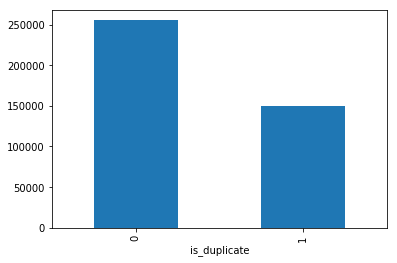

In [6]:
# Lets examine the balance of our clases

df_train.groupby("is_duplicate")['id'].count().plot.bar();

Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780



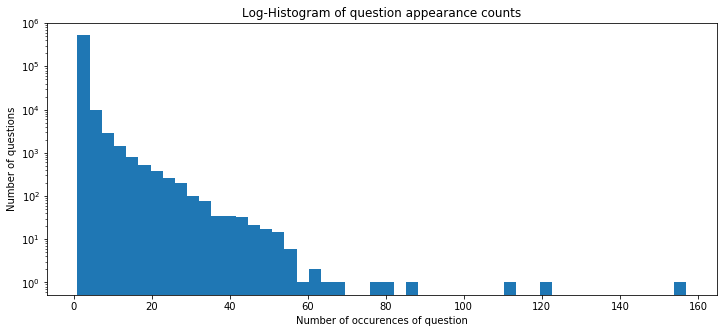

In [5]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [6]:
df_test = pd.read_csv('test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [7]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


In [8]:
import seaborn as sns

pal = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

mean-train 59.82 std-train 31.96 mean-test 60.07 std-test 31.62 max-train 1169.00 max-test 1176.00


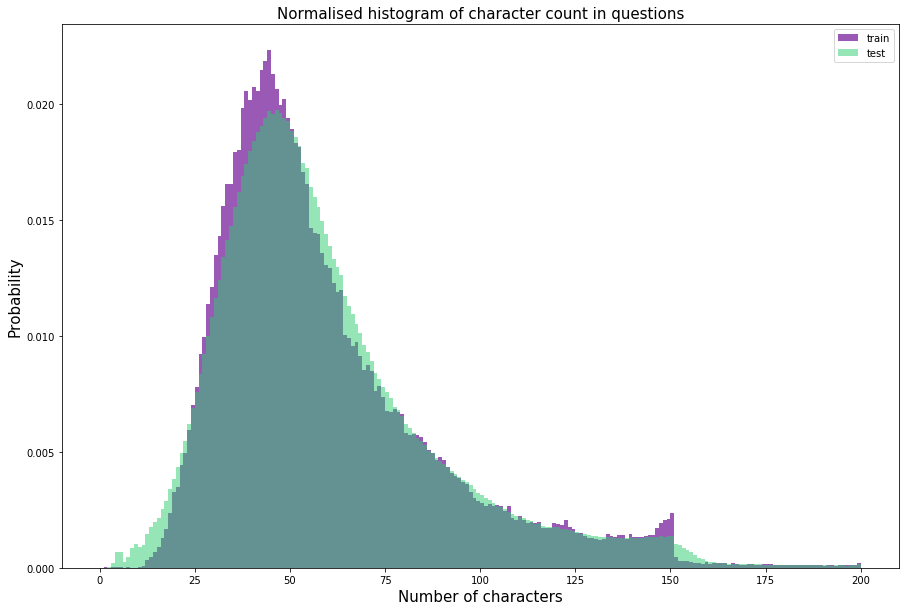

In [9]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[0], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[5], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


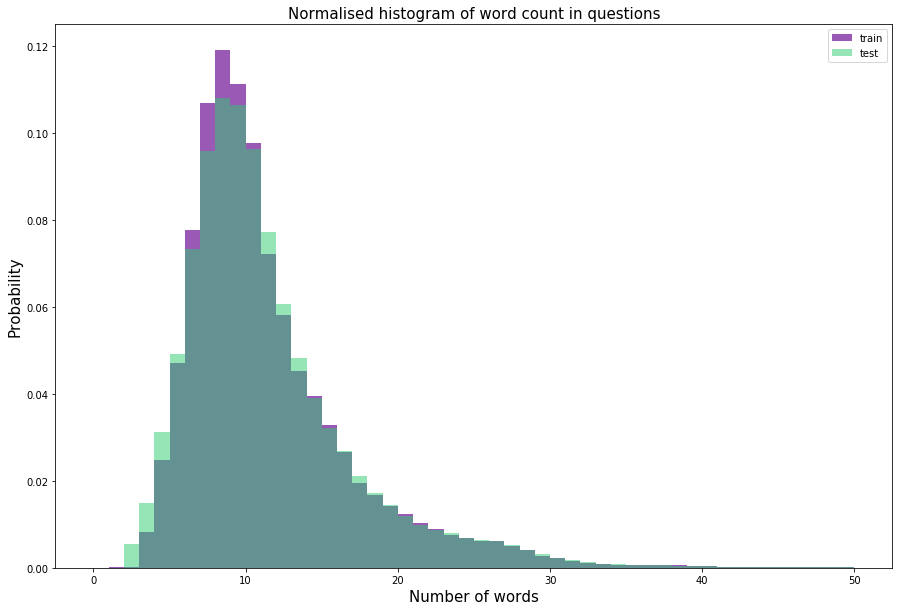

In [10]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[0], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[5], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

### WordCloud

(-0.5, 1439.5, 1079.5, -0.5)

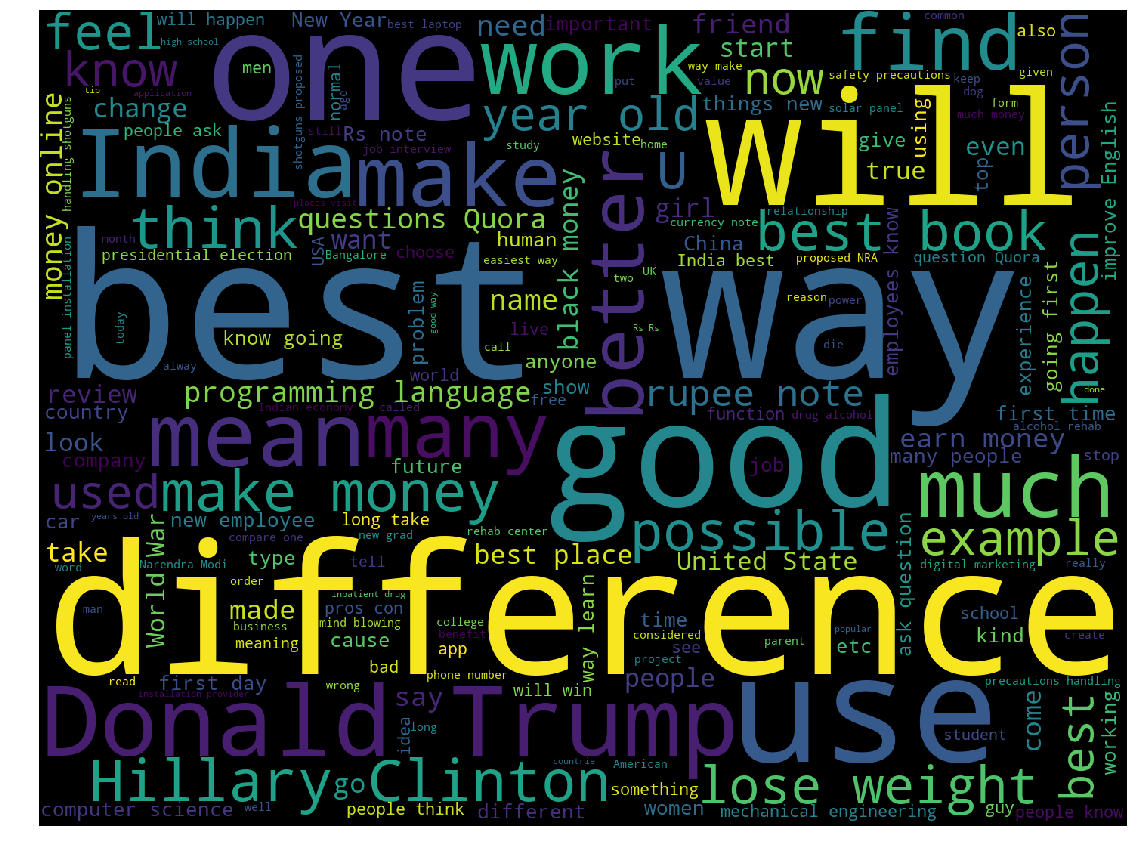

In [11]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [12]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


### Word Share

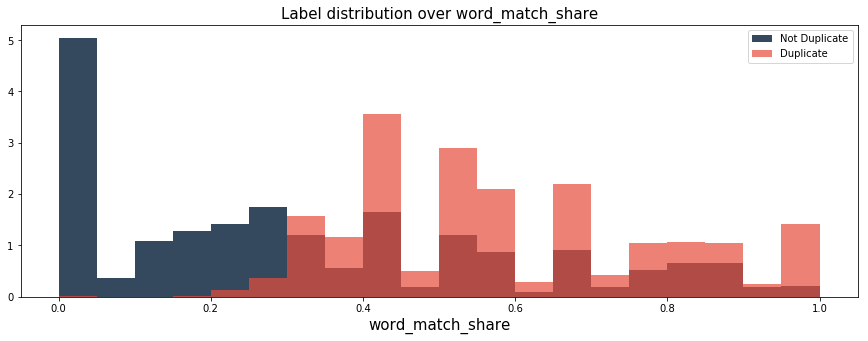

In [19]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, color=pal[4], normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, color=pal[3], normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)
plt.show();

In [3]:
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE

Using TensorFlow backend.


In [22]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Preprocessing

In [4]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

In [5]:
data = clean_dataframe(df_train)

/Users/ashvets/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [102]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

In [103]:
corpus = build_corpus(data)        

In [104]:
len(corpus)

808576

### Train Word2Vec on Corpus

In [43]:
model = word2bvec.Word2Vec(corpus, size=128, window=20, min_count=800)

In [44]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show();

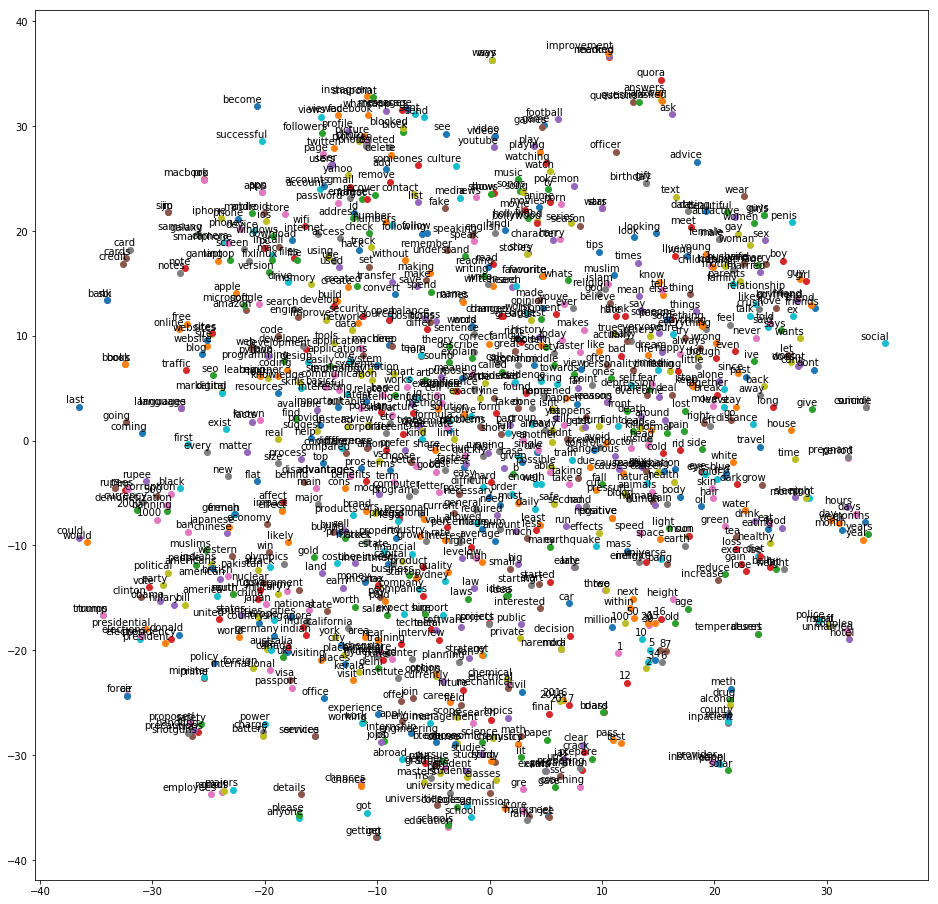

In [45]:
tsne_plot(model)

### Pre-Trained Word2Vec

In [8]:
from time import time
start_nb = time()

In [9]:
import gensim

start = time()

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

print('Cell took %.2f seconds to run.' % (time() - start))

Cell took 185.21 seconds to run.


In [76]:
model.init_sims(replace=True)

In [77]:
data.question1[0]

'step step guide invest share market india'

In [40]:
unique_ids = list(np.unique(data.id))

### Compute Word Mover's Distance

In [42]:
start = time()

distances = []
for unique_id in unique_ids:
    distances.append(model.wmdistance(data.question1[unique_id], data.question2[unique_id]))
    
print('Cell took %.2f seconds to run.' % (time() - start))

Cell took 1317.33 seconds to run.


In [146]:
data.head(15)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guide invest share market india,step step guide invest share market,0
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0
3,3,7,8,mentally lonely solve,find remainder math2324math divided 2423,0
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0
5,5,11,12,astrology capricorn sun cap moon cap risingwha...,triple capricorn sun moon ascendant capricorn say,1
6,6,13,14,buy tiago,keeps childern active far phone video games,0
7,7,15,16,good geologist,great geologist,1
8,8,17,18,use シ instead し,use instead,0
9,9,19,20,motorola company hack charter motorolla dcx3400,hack motorola dcx3400 free internet,0


In [145]:
for i in range(15):
    print(data.question1[i], '-', data.question2[i], distances[i], data.is_duplicate[i])

step step guide invest share market india - step step guide invest share market 0.31446556118 0
story kohinoor kohinoor diamond - would happen indian government stole kohinoor kohinoor diamond back 0.817188624861 0
increase speed internet connection using vpn - internet speed increased hacking dns 0.607674969095 0
mentally lonely solve - find remainder math2324math divided 2423 1.9079652996 0
one dissolve water quikly sugar salt methane carbon oxide - fish would survive salt water 1.0358828487 0
astrology capricorn sun cap moon cap risingwhat say - triple capricorn sun moon ascendant capricorn say 0.510626554893 1
buy tiago - keeps childern active far phone video games 2.32818680793 0
good geologist - great geologist 0.649242250608 1
use シ instead し - use  instead 0.0 0
motorola company hack charter motorolla dcx3400 - hack motorola dcx3400 free internet 0.859734710062 0
method find separation slits using fresnel biprism - things technicians tell durability reliability laptops componen

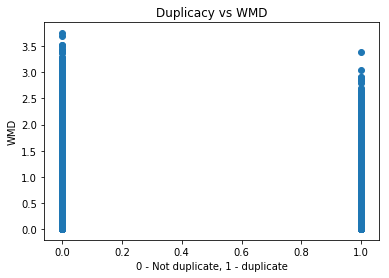

In [152]:
plt.scatter(x=list(data.is_duplicate), y=distances)
plt.title('Duplicacy vs WMD')
plt.xlabel('0 - Not duplicate, 1 - duplicate')
plt.ylabel('WMD');

In [18]:
df_train = pd.read_csv("data/train.csv").fillna("")

df_train['q1len'] = df_train['question1'].str.len()
df_train['q2len'] = df_train['question2'].str.len()

df_train['q1_n_words'] = df_train['question1'].apply(lambda row: len(row.split(" ")))
df_train['q2_n_words'] = df_train['question2'].apply(lambda row: len(row.split(" ")))

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df_train['word_share'] = df_train.apply(normalized_word_share, axis=1)

df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000


In [31]:
df_subsampled = df_train[0:10000]

trace = go.Scatter(
    y = df_subsampled['q2_n_words'].values,
    x = df_subsampled['q1_n_words'].values,
    mode='markers',
    marker=dict(
        size= df_subsampled['word_share'].values * 60,
        color = df_subsampled['is_duplicate'].values,
        colorscale='Portland',
        showscale=True,
        opacity=0.5,
        colorbar = dict(title = 'duplicate')
    ),
    text = np.round(df_subsampled['word_share'].values, decimals=2)
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of word count of question 1 & 2',
    hovermode= 'closest',
        xaxis=dict(
        title= 'Question 1 word count',
        showgrid=False,
        zeroline=False,
        showline=False,
        range=[0,70]
    ),
    yaxis=dict(
        title= 'Question 2 word count',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
        range=[0,70]
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterWords')


In [90]:
sorted_distances = np.sort(distances)
sorted_distances[-226:]

array([ 3.75080684,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,      

In [89]:
# replace inf by largest distance
distances_edited = [4 if x==np.inf else x for x in distances]

In [91]:
X = np.asarray(distances_edited)
y = np.asarray(list(data.is_duplicate))

In [92]:
X = np.reshape(X, (len(X), 1))
y = np.reshape(y, (len(y), 1))

In [93]:
np.all(np.isfinite(X))

True

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/Users/ashvets/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
from sklearn.metrics import log_loss

y_predict = model2.predict(X_test)
model2.score(X_test, y_test)

0.66304715262146807

In [100]:
log_loss(y_predict, y_test)

11.638142769360281

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer(corpus, stop_words='English', strip_accents=True)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=[['step', 'step', 'guide', 'invest', 'share', 'market', 'india'], ['story', 'kohinoor', 'kohinoor', 'diamond'], ['increase', 'speed', 'internet', 'connection', 'using', 'vpn'], ['mentally', 'lonely', 'solve'], ['one', 'dissolve', 'water', 'quikly', 'sugar', 'salt', 'methane', 'carbon', 'oxide'...e', 'hair', 'styling', 'product', 'one', 'prefer', 'gel', 'wax', 'clay'], ['like', 'sex', 'cousin']],
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='English',
        strip_accents=True, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [112]:
tokens = []
for sentence in corpus:
    for word in sentence:
        tokens.append(word)

In [113]:
import nltk

fdist = nltk.FreqDist(tokens)

In [123]:
start = time()

model = word2vec.Word2Vec(corpus, size=128, window=20, min_count=10)

print('Cell took %.2f seconds to run.' % (time() - start))

Cell took 476.27 seconds to run.


In [124]:
model.init_sims(replace=True)

In [125]:
start = time()

distances_model = []
for unique_id in unique_ids:
    distances_model.append(model.wmdistance(data.question1[unique_id], data.question2[unique_id]))
    
print('Cell took %.2f seconds to run.' % (time() - start))

Cell took 223.99 seconds to run.


In [126]:
X = np.asarray(distances_edited)
y = np.asarray(list(data.is_duplicate))

X = np.reshape(X, (len(X), 1))
y = np.reshape(y, (len(y), 1))

In [127]:
np.all(np.isfinite(X))

True

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/Users/ashvets/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
y_predict = model2.predict(X_test)
model2.score(X_test, y_test)

0.66304715262146807

In [130]:
log_loss(y_predict, y_test)

11.638142769360281

In [153]:
model.most_similar('school')

[('college', 0.713804304599762),
 ('schools', 0.669937014579773),
 ('grades', 0.6367888450622559),
 ('highschool', 0.6053430438041687),
 ('teacher', 0.5675466060638428),
 ('teachers', 0.5613933205604553),
 ('schooler', 0.5387104153633118),
 ('student', 0.5344268083572388),
 ('undergrad', 0.5339065790176392),
 ('university', 0.5267066359519958)]